### 모듈 및 데이터 불러오기

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

C:\Users\admin\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
C:\Users\admin\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
In C:\Users\admin\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\admin\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\admin\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' 

In [25]:
data = pd.read_csv('Mall_Customers.csv')

### 데이터 특성 확인

In [5]:
data.shape

(200, 5)

In [7]:
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
CustomerID                200 non-null int64
Gender                    200 non-null object
Age                       200 non-null int64
Annual Income (k$)        200 non-null int64
Spending Score (1-100)    200 non-null int64
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [9]:
data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [26]:
data = pd.get_dummies(data, columns=['Gender'], drop_first=True)

In [27]:
data = data.iloc[:,1:]

In [28]:
data.head()

,Age,Annual Income (k$),Spending Score (1-100),Gender_Male
0,19,15,39,1
1,21,15,81,1
2,20,16,6,0
3,23,16,77,0
4,31,17,40,0


### KMeans Clustering modeling

In [13]:
from sklearn.cluster import KMeans

In [11]:
model = KMeans(n_clusters=3)

In [29]:
model.fit(data)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [30]:
model.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2])

In [31]:
result_df = data.copy()

In [32]:
result_df['label'] = model.labels_

In [33]:
result_df.head(20)

,Age,Annual Income (k$),Spending Score (1-100),Gender_Male,label
0,19,15,39,1,1
1,21,15,81,1,1
2,20,16,6,0,1
3,23,16,77,0,1
4,31,17,40,0,1
5,22,17,76,0,1
6,35,18,6,0,1
7,23,18,94,0,1
8,64,19,3,1,1
9,30,19,72,0,1


### groupby를 통한, 레이블 별 통계 정보 확인

In [34]:
result_df.groupby('label').mean()

,Age,Annual Income (k$),Spending Score (1-100),Gender_Male
label,,,,
0,40.394737,87.000000,18.631579,0.526316
1,40.325203,44.154472,49.829268,0.406504
2,32.692308,86.538462,82.128205,0.461538


### cluster 별, 관측치 갯수 확인

In [35]:
result_df['label'].value_counts()

1    123
2     39
0     38
Name: label, dtype: int64

### 관측치가 적정하게 나눠졌는지, elbow method 활용

In [36]:
distance = []
for i in range(2, 11):
    model = KMeans(n_clusters=i)
    model.fit(data)
    distance.append(model.inertia_)
    
    

<AxesSubplot:>

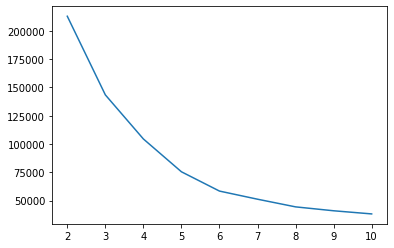

In [37]:
sns.lineplot(x=list(range(2,11)), y = distance) ## 엘보가 완만하기 때문에 명확하게 클러스터 수를 정하기 애매한 상황

### silhoutte score(엘보 메써드로 확인이 어려운 경우)

In [38]:
from sklearn.metrics import silhouette_score

In [39]:
silhouette_score(data, model.labels_)

0.3772061632352579

In [42]:
sil = []
for i in range(2, 11):
    model = KMeans(n_clusters=i)
    model.fit(data)
    sil.append(silhouette_score(data, model.labels_))

<AxesSubplot:>

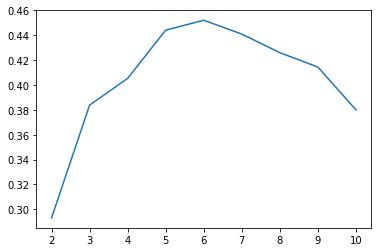

In [43]:
sns.lineplot(x=list(range(2,11)), y = sil) ## 높은 값을 선정하면 된다. 

In [44]:
model = KMeans(n_clusters=6)
model.fit(data)
data['label'] = model.labels_

In [45]:
data.groupby('label').mean()

,Age,Annual Income (k$),Spending Score (1-100),Gender_Male
label,,,,
0,25.272727,25.727273,79.363636,0.409091
1,56.155556,53.377778,49.088889,0.444444
2,27.000000,56.657895,49.131579,0.342105
3,44.142857,25.142857,19.523810,0.380952
4,41.685714,88.228571,17.285714,0.571429
5,32.692308,86.538462,82.128205,0.461538


<AxesSubplot:xlabel='label', ylabel='Age'>

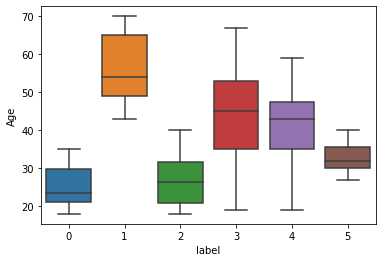

In [46]:
sns.boxplot(x = 'label', y = 'Age', data = data)

<AxesSubplot:xlabel='label', ylabel='Annual Income (k$)'>

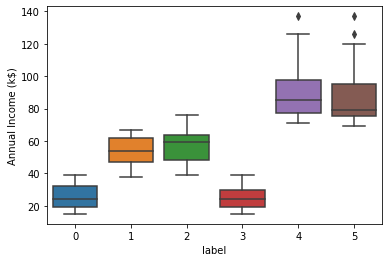

In [49]:
sns.boxplot(x = 'label', y = 'Annual Income (k$)', data = data)

# PCA를 활용한 변수를 줄이고 scatter plot 그리기

In [50]:
data.drop('label', axis = 1, inplace = True)

In [51]:
from sklearn.decomposition import PCA

In [52]:
pca = PCA(n_components=2) ## 2개 차원으로 줄이겠다. 
pca.fit(data)
pca_df = pca.transform(data)

In [53]:
pca_df

array([[-3.18699448e+01, -3.30012521e+01],
       [ 7.64494048e-01, -5.68429006e+01],
       [-5.74082757e+01, -1.31249607e+01],
       [-2.16854252e+00, -5.34785900e+01],
       [-3.21740846e+01, -3.03884119e+01],
       [-2.17695183e+00, -5.22272685e+01],
       [-5.90656895e+01, -9.54376302e+00],
       [ 1.23708622e+01, -6.16180208e+01],
       [-6.63157690e+01, -3.21423160e+00],
       [-5.65556212e+00, -4.72672225e+01],
       [-5.82365979e+01, -9.13418751e+00],
       [ 1.46218043e+01, -6.21075685e+01],
       [-5.51608374e+01, -1.00799251e+01],
       [-3.02878330e-03, -5.01140754e+01],
       [-5.27646657e+01, -1.16807468e+01],
       [ 1.94661180e+00, -5.15222086e+01],
       [-3.45055496e+01, -2.37615402e+01],
       [-7.30493262e+00, -4.35151138e+01],
       [-4.12573070e+01, -1.64734737e+01],
       [ 1.61902860e+01, -5.83001207e+01],
       [-3.27400141e+01, -2.13347966e+01],
       [-9.81885245e-01, -4.44524038e+01],
       [-5.78100898e+01, -1.87057486e+00],
       [-1.

In [54]:
pca_df = pd.DataFrame(pca_df, columns=['PC1', 'PC2'])

In [55]:
pca_df

,PC1,PC2
0,-31.869945,-33.001252
1,0.764494,-56.842901
2,-57.408276,-13.124961
3,-2.168543,-53.478590
4,-32.174085,-30.388412
...,...,...
195,58.352515,31.017542
196,19.908001,66.446108
197,58.520804,38.346039
198,20.979130,79.376405


<AxesSubplot:xlabel='PC1', ylabel='PC2'>

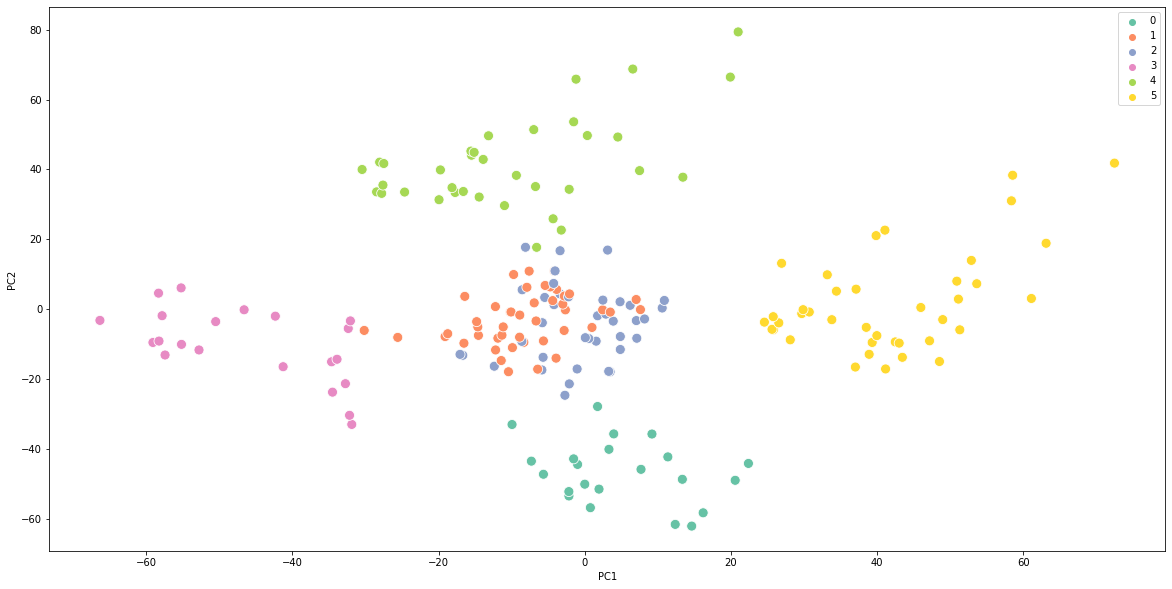

In [56]:
plt.figure(figsize = (20,10))
sns.scatterplot(x = pca_df['PC1'], y = pca_df['PC2'], hue = model.labels_, palette='Set2', s = 100)